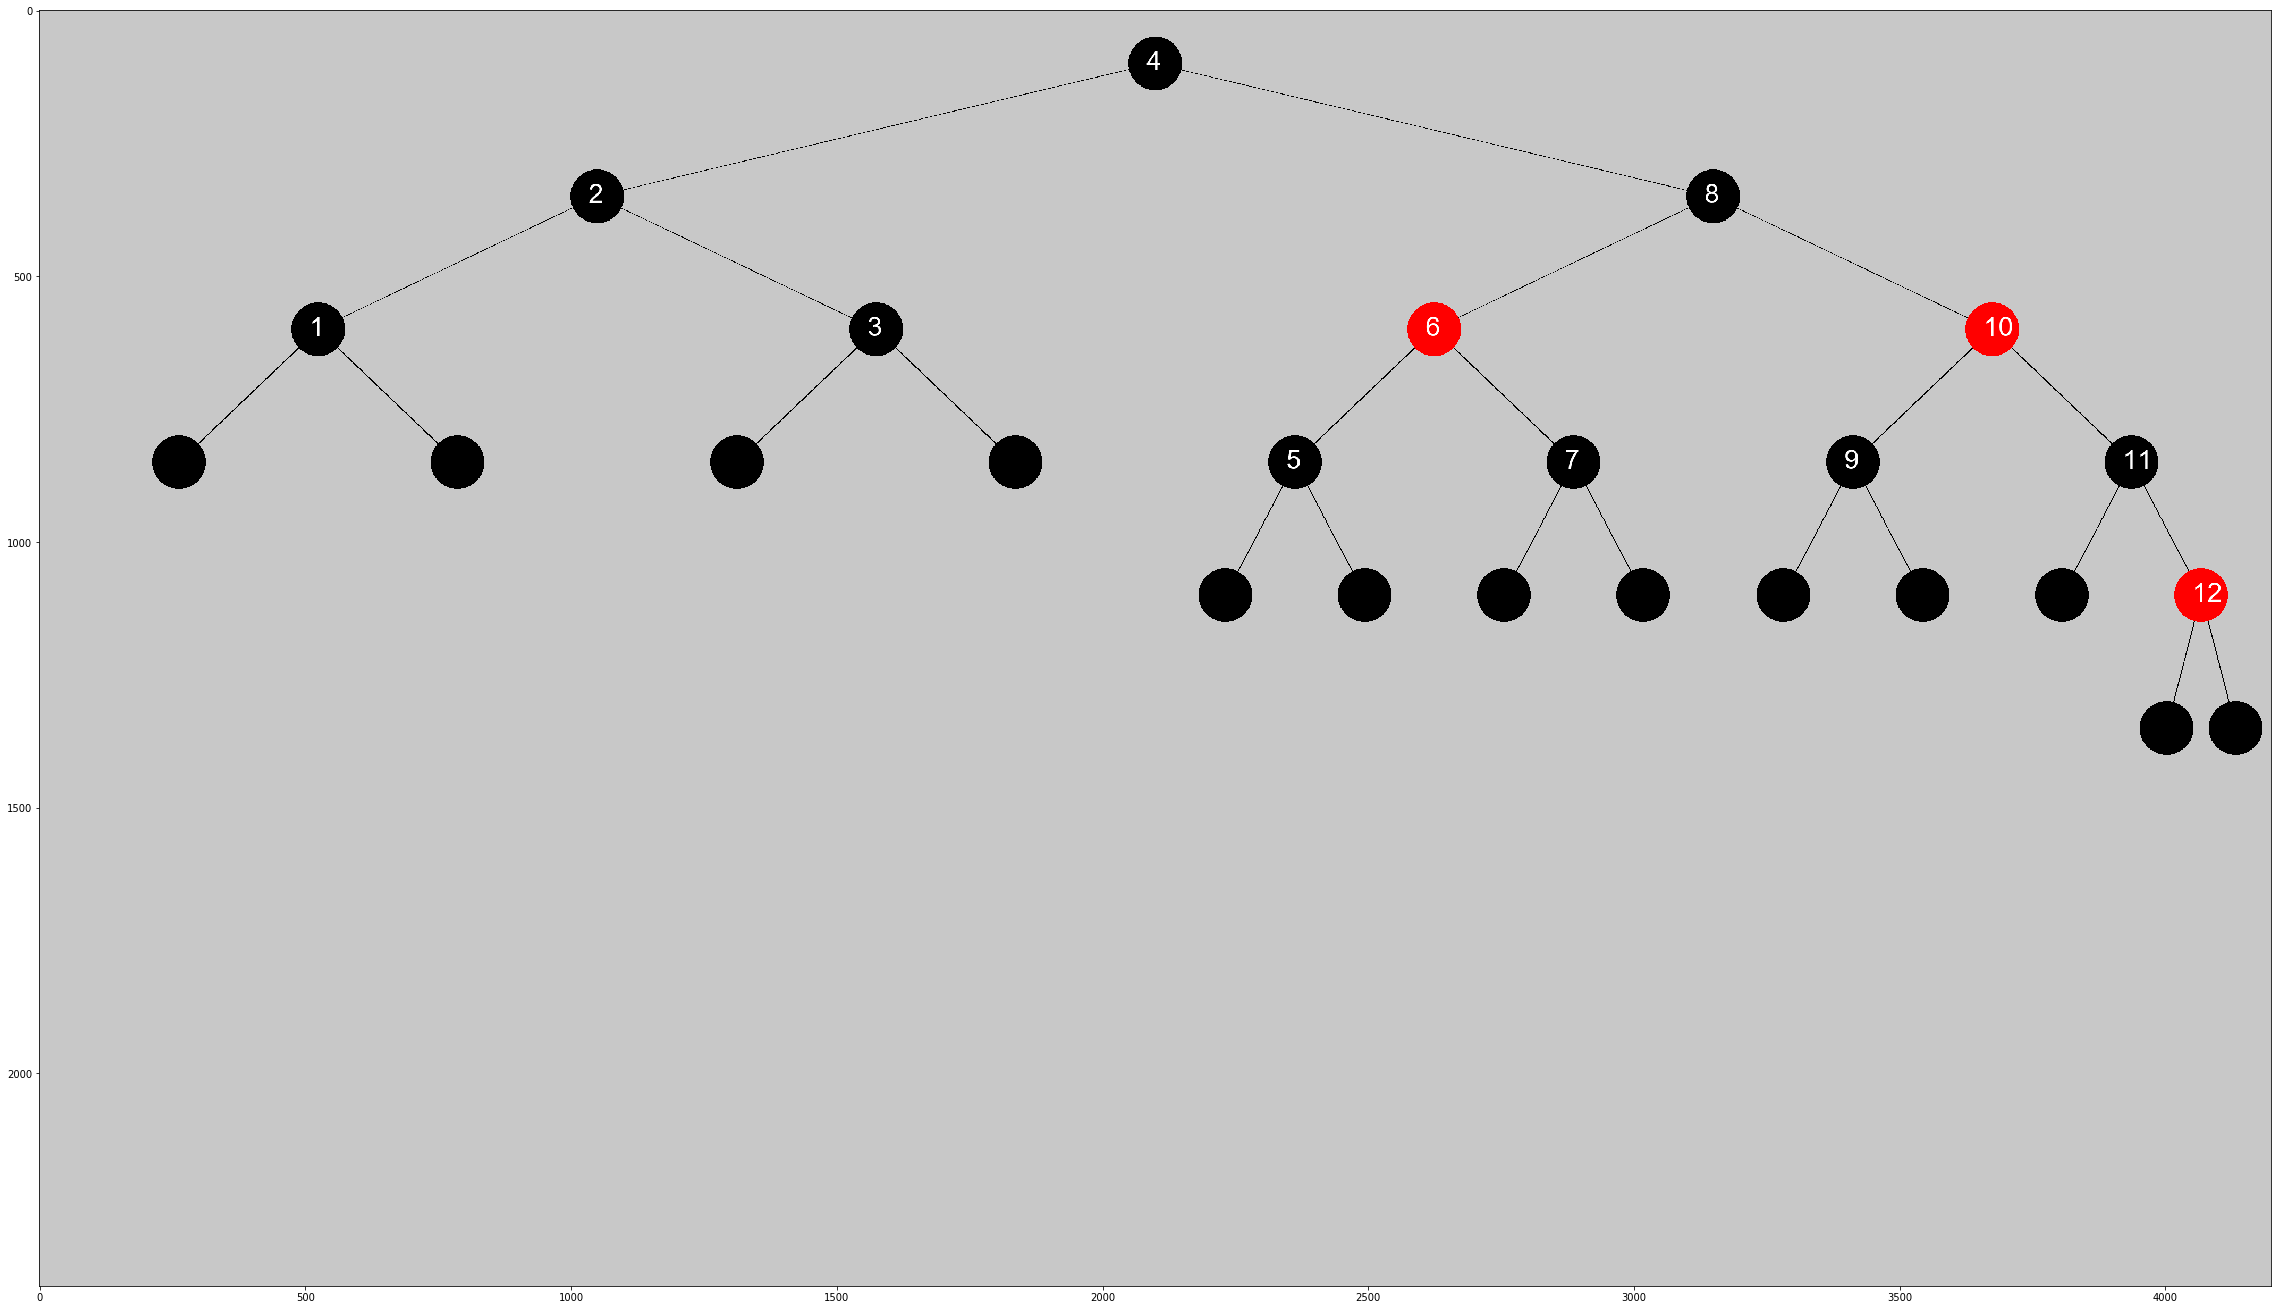

3
4
5
6
7


In [13]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

Colour = Enum('Colour', 'BLACK RED')


class Node:
    def __init__(self,data):
        self.parent = None
        self.left = None
        self.right = None
        self.data = data
        self.colour = Colour.BLACK
        
        
    def DrawNode(self,r,sizeX,sizeY,img,d,f,currentLevel,currentX,currentY):
        
        if self.left:
            d.line([(currentX, currentY) , (currentX - sizeX//(2**currentLevel),currentY + 5 * r)], width = 2, fill=(0,0,0))
            self.left.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX - sizeX//(2**currentLevel),currentY + 5 * r)
        if self.right:
            d.line([(currentX, currentY) , (currentX + sizeX//(2**currentLevel),currentY + 5 * r)], width = 2, fill=(0,0,0))
            self.right.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX + sizeX//(2**currentLevel),currentY + 5 * r)
            
        if self.colour == Colour.BLACK:
            d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (0,0,0),fill = (0,0,0), width = 1)
        else:
            d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (255,0,0),fill = (255,0,0), width = 1)
            
        if self.data:
            d.text((currentX-r//3,currentY-2*r//3),str(self.data), fill=(255,255,255), font = f)
            
            
        
class Tree():
    def __init__(self):
        self.tnull = Node(None)
        self.root = self.tnull
        
        
    def PrintTree(self,node):
        if node.left:
            self.PrintTree(node.left)
        print(self.data)
        if node.right:
            self.PrintTree(node.right)
            
            
    def Insert(self, key):
        y = self.root
        if y!= self.tnull:
            while 1 == 1:
                if key >= y.data:
                    if y.right != self.tnull:
                        y = y.right
                    else:
                        y.right = Node(key)
                        y.right.parent = y
                        y.right.left = self.tnull
                        y.right.right = self.tnull
                        y.right.colour = Colour.RED
                        self.InsertFixup(y.right)
                        break
                else:
                    if y.left != self.tnull:
                        y = y.left
                    else:
                        y.left = Node(key)
                        y.left.parent = y
                        y.left.left = self.tnull
                        y.left.right = self.tnull
                        y.left.colour = Colour.RED
                        self.InsertFixup(y.left)
                        break
        else:
            self.root = Node(key)
            y = self.root
            self.root.parent = self.tnull
            self.root.left = self.tnull
            self.root.right = self.tnull
            
            
            
    def InsertFixup(self, z):
        while z.parent.colour == Colour.RED:
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right
                if y.colour == Colour.RED:
                    z.parent.colour = Colour.BLACK
                    y.colour = Colour.BLACK
                    z.parent.parent.colour = Colour.RED
                    z = z.parent.parent
                else:
                    if z == z.parent.right:
                        z = z.parent
                        self.LeftRotate(z)
                    z.parent.colour = Colour.BLACK
                    z.parent.parent.colour = Colour.RED
                    self.RightRotate(z.parent.parent)
            else:
                y = z.parent.parent.left
                if y.colour == Colour.RED:
                    z.parent.colour = Colour.BLACK
                    y.colour = Colour.BLACK
                    z.parent.parent.colour = Colour.RED
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.RightRotate(z)
                    z.parent.colour = Colour.BLACK
                    z.parent.parent.colour = Colour.RED
                    self.LeftRotate(z.parent.parent)
        self.root.colour = Colour.BLACK
                    
            
    def InsertList(self,lst):
        for i in lst:
            self.Insert(i)
    
    
    def LeftRotate(self,x):
        y = x.right
        if self.root == x:
            self.root = y
            y.parent = self.tnull
        else:
            if x == x.parent.left:
                x.parent.left = y
                x.parent.left.parent = x.parent
            else:
                x.parent.right = y
                x.parent.right.parent = x.parent

        x.right = y.left
        x.right.parent = x
        y.left = x
        y.left.parent = y
        
        
    def RightRotate(self,x):
        y = x.left
        if self.root == x:
            self.root = y
            y.parent = self.tnull
        else:
            if x == x.parent.left:
                x.parent.left = y
                x.parent.left.parent = x.parent
            else:
                x.parent.right = y
                x.parent.right.parent = x.parent
        x.left = y.right
        x.left.parent = x
        y.right = x
        y.right.parent = y
    
    def Transplant(self,x,y):
        if x.parent == self.tnull:
            T.root = y
        else:
            if x == x.parent.left:
                x.parent.left = y
            else:
                x.parent.right = y
        y.parent = x.parent
    
    def Delete(self,z):
        y = z
        yOr = y.colour
        if z.left == self.tnull:
            x = z.right
            self.Transplant(z,z.right)
        elif z.right == self.tnull:
            x = z.left
            self.Transplant(z,z.left)
        else:
            y = self.TreeMinimum(z.right)
            yOr = y.colour
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.Transplant(y,y.right)
                y.right = z.right
                y.right.parent = y
            self.Transplant(z,y)
            y.left = z.left
            y.left.parent = y
            y.colour = z.colour
        if yOr == Colour.BLACK:
            self.DeleteFixup(x)
        
    def DeleteFixup(self,x):
        while x!=self.root and x.colour == Colour.BLACK:
            if x == x.parent.left:
                w = x.parent.right
                if w.colour == Colour.RED:
                    w.colour = Colour.BLACK
                    x.parent.colour = Colour.RED
                    self.LeftRotate(x.parent)
                    w = x.parent.right
                if w.left.colour == Colour.BLACK and w.right.colour == Colour.BLACK:
                    w.colour = Colour.RED
                    x = x.parent
                else:
                    if w.right.colour == Colour.BLACK:
                        w.left.colour = Colour.BLACK
                        w.colour = Colour.RED
                        self.RightRotate(w)
                        w = x.parent.right
                    w.colour = x.parent.colour
                    x.parent.colour = Colour.BLACK
                    w.right.colour = Colour.BLACK
                    self.LeftRotate(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w.colour == Colour.RED:
                    w.colour = Colour.BLACK
                    x.paraent.colour = Colour.RED
                    self.RightRotate(x.parent)
                    w = x.parent.left
                if w.right.colour == Colour.BLACK and w.left.colour == Colour.BLACK:
                    w.colour = Colour.RED
                    x = x.parent
                else:
                    if w.left.colour == Colour.BLACK:
                        w.right.colour = Colour.BLACK
                        w.colour = Colour.RED
                        self.LeftRotate(w)
                        w = x.parent.left
                    w.colour = x.parent.colour
                    x.parent.colour = Colour.BLACK
                    w.left.colour = Colour.BLACK
                    self.RightRotate(x.parent)
                    x= self.root
        x.colour = Colour.BLACK
                    
                    
    def TreeMinimum(self,x):
        if x.left == self.tnull:
            return x
        else:
            return self.TreeMinimum(x.left)
        
    def TreeMaximum(self,x):
        if x.right == self.tnull:
            return x
        else:
            return self.TreeMaximum(x.right)
            
    def DrawTree(self,name):
        currentLevel = 1
        r = 50
        sizeX = 4200
        sizeY = 2400
        img = Image.new('RGB', (sizeX, sizeY), color = (200,200,200))
        d = ImageDraw.Draw(img)
        f = ImageFont.truetype("arial.ttf", r)
        
        currentX, currentY = sizeX//2, 2*r
        if self.root:
            self.root.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX,currentY)
        
        img.save(name)
        
    def Search(self,key):
        x = self.root
        while 1==1:
            if x.data == key:
                return x
            if key < x.data:
                if x.left == self.tnull:
                    return None
                else:
                    x = x.left
            else:
                if x.right == self.tnull:
                    return None
                else:
                    x = x.right
                    
                    
    def BlackHeight(self):
        x = self.root
        count = 0
        while x.left:
            x = x.left
            if x.colour == Colour.BLACK:
                count += 1
        return count
    
    def NodeInfo(self,x):
        print("Data: ", end = "")
        if x.data:
            print(x.data,end = "")
        print("; ",end = "")
        print("Parent: ", end = "")
        if x.parent.data:
            print(x.parent.data,end = "")
        print("; ",end = "")
        print("Left Child: ", end = "")
        if x.left.data:
            print(x.left.data,end = "")
        print("; ",end = "")
        print("Right Child: ", end = "")
        if x.right.data:
            print(x.right.data,end = "")
        print("; ",end = "")
        print()
    
    def TreeWalk(self,x):
        if x.left.data:
            self.TreeWalk(x.left)
        self.NodeInfo(x)
        if x.right.data:
            self.TreeWalk(x.right)
            
    def Enumerate(self,x,a,b):
        if x.data:
            if x.data > b:
                if x.left.data:
                    self.Enumerate(x.left,a,b)
            elif x.data < a:
                if x.right.data:
                    self.Enumerate(x.right,a,b)
            else:
                if x.left:
                    self.Enumerate(x.left,a,b)
                print(x.data)
                if x.right:
                    self.Enumerate(x.right,a,b)
            
        
def ShowImage():
    T.DrawTree('pil.png')
    pil_im = Image.open('pil.png', 'r')
    plt.figure().set_size_inches(40,100)
    plt.imshow(np.asarray(pil_im))
    plt.show()
    pil_im.close()
    
    
T = Tree()
T.InsertList([1,2,3,4,5,6,7,8,9,10,11,12])
ShowImage()
T.Enumerate(T.root, 3,7)
